In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import glob 
from numpy.linalg import eig
import seaborn as sns
sns.set()
%matplotlib inline

In [50]:
#Get adjusting closing prices from each {sector}.csv file

df = pd.concat([pd.read_csv(f, usecols=[0,5], index_col = [0]) for f in glob.glob('*.csv')], ignore_index = True, axis = 1)

In [51]:
#Change column names to sector names
labels = [ f[0:3] for f in glob.glob('*.csv') ]
df.columns = labels

#Create dictionary mapping tickers to names


In [52]:
ret = df.pct_change().dropna()
ret.head()

,XLB,XLE,XLF,XLI,XLK,XLP,XLU,XLV,XLY
Date,,,,,,,,,
1998-12-23,0.010504,0.020820,0.014743,0.017452,0.023893,0.024174,-0.004191,0.022472,0.004294
1998-12-24,0.023014,-0.005263,0.006607,0.013193,-0.003810,-0.001727,0.018412,0.006107,0.018327
1998-12-28,-0.008709,-0.005291,-0.013123,0.005208,0.002867,-0.005767,-0.005167,-0.014563,-0.008999
1998-12-29,0.018302,0.009973,0.010638,0.014247,0.002861,0.022042,0.016615,0.022167,0.021792
1998-12-30,-0.002876,-0.015142,-0.003949,-0.004471,-0.003802,-0.006243,-0.008172,-0.008436,-0.008294


<BarContainer object of 9 artists>

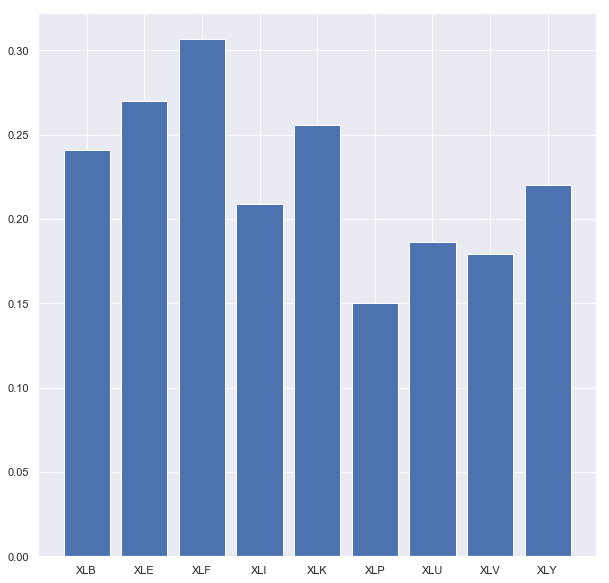

In [53]:
#Should you normalize this data? We'll come back to this...
volatility = ret.std()*np.sqrt(252)
plt.figure(figsize =(10,10))
plt.bar(volatility.index, volatility)


In [54]:
## Get Eigenvectors and Eigenvalues
eig_val, eig_vec = eig(ret.cov())


Text(0.5,1,'Cumalative Explained Variance')

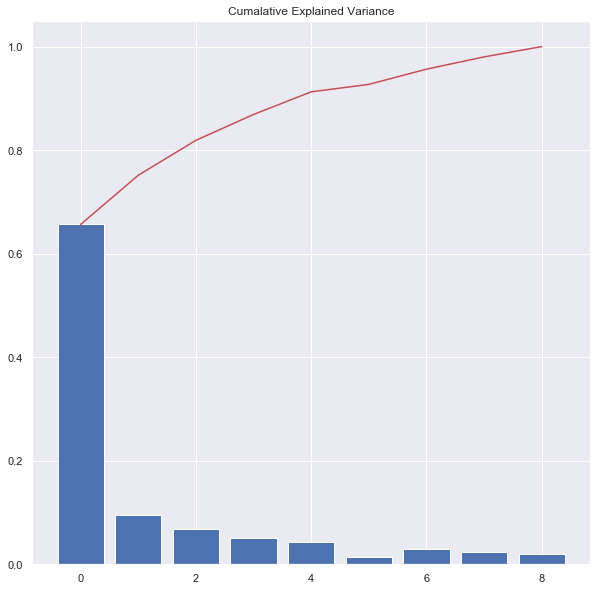

In [56]:
## Plot eigen values (percentage of explained variance) and the cumulative explained variance

x = list(range(len(eig_val)))
y = [x / sum(eig_val) for x in eig_val]

plt.figure(figsize =(10,10))
plt.bar(x, y)
plt.plot(np.cumsum(y), color = 'r')
plt.title("Cumalative Explained Variance")

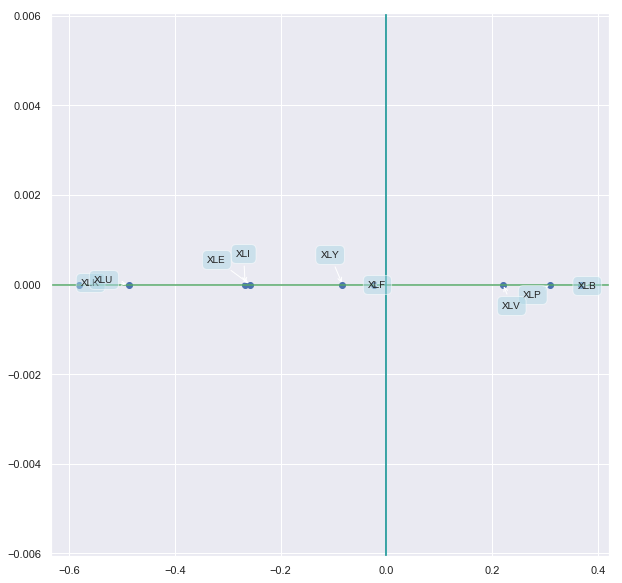

In [55]:
#project eigenvectors in 1-d
y1 = eig_vec[0,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, [0]*9, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, [0]*9):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(np.random.randint(low =-30, high =30), np.random.randint(low =-30, high =30)),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

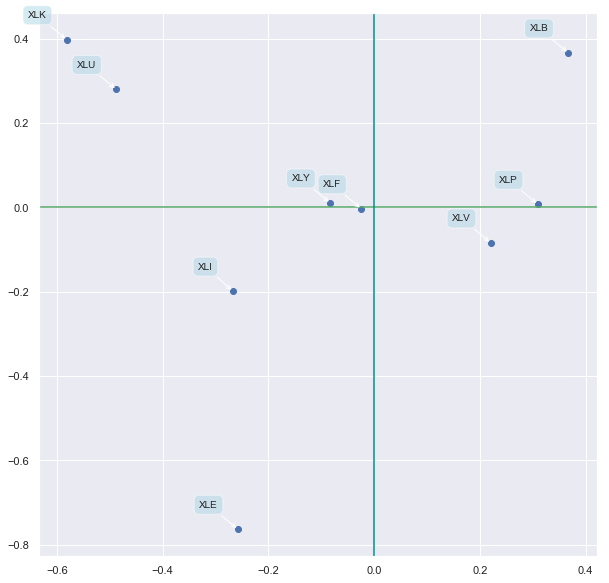

In [58]:
#project eigenvectors in 2-d
y1 = eig_vec[0,:]
y2 = eig_vec[1,:]

plt.figure(figsize =(10,10))
plt.scatter(y1, y2, marker = 'o')
plt.axhline(y = 0, color = 'g')
plt.axvline(x = 0, color = 'darkcyan')

for label, x_, y_ in zip(labels, y1, y2):
    plt.annotate(
        label,
        xy=(x_, y_), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='lightblue', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

<BarContainer object of 9 artists>

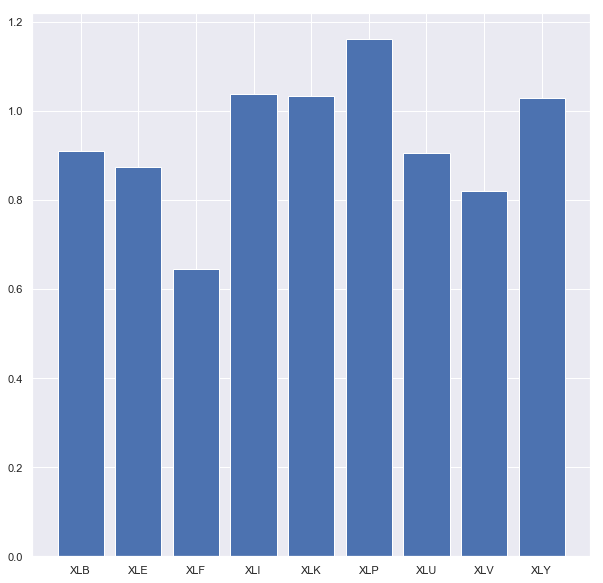

In [57]:
### Step 2 
### Normalize Data
ret_ = (ret - ret.mean()) / (ret.max() - ret.min())

# Check Volatility
vol_ = ret_.std()*np.sqrt(252)
plt.figure(figsize =(10,10))
plt.bar(vol_.index, vol_)

In [64]:
# Find new eigenvalues 
eig_val_2, eig_vec_2 = eig(ret_.cov())

Text(0.5,1,'Cumalative Explained Variance')

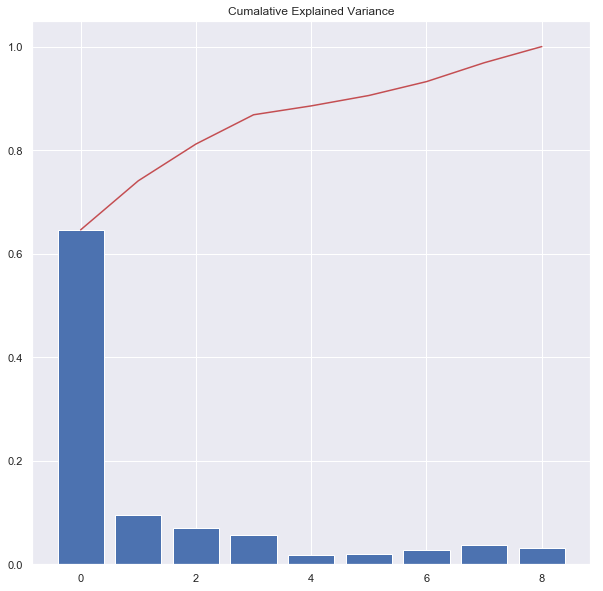

In [69]:
## Plot eigen values (percentage of explained variance) and the cumulative explained variance

x_2 = list(range(len(eig_val_2)))
y_2 = [x / sum(eig_val_2) for x in eig_val_2]
plt.figure(figsize =(10,10))
plt.bar(x_2, y_2)
plt.plot(np.cumsum(y_2), color = 'r')
plt.title("Cumalative Explained Variance")